In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import IPython.display as ipd
from tqdm.notebook import tqdm

In [ ]:
#import subprocess

In [ ]:
ipd.Video("026c7465-309f6d33.mp4",width = 200)

Open the Video and Read Metadata

In [ ]:
!pip install opencv-python

In [ ]:
# Load in video capture
import cv2
cap = cv2.VideoCapture('026c7465-309f6d33.mp4')

In [ ]:
# Total number of frames in video
cap.get(cv2.CAP_PROP_FRAME_COUNT)

2398.0

In [ ]:
# Video height and width
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f'Height {height}, Width {width}')

Height 720.0, Width 1280.0


In [ ]:
# Get frames per second
fps = cap.get(cv2.CAP_PROP_FPS)
print(f'FPS : {fps:0.2f}')

FPS : 59.94


In [ ]:
cap.release()

Pull the image from the first frame

In [ ]:
cap = cv2.VideoCapture('026c7465-309f6d33.mp4')
ret, img = cap.read()                            #will return TRUE everytime we call this function till we reach the end of the video
print(f'Returned {ret} and img of shape {img.shape}')

Returned True and img of shape (720, 1280, 3)


Loading the First Image

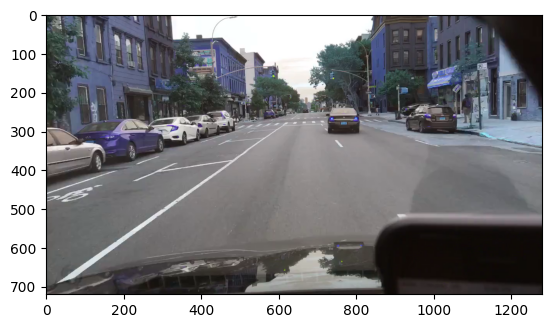

In [ ]:
plt.imshow(img)  #opencv loads color in BGR format, matplot lib expects RGB format


In [ ]:
## Helper function for plotting opencv images in notebook
def display_cv2_img(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis("off")

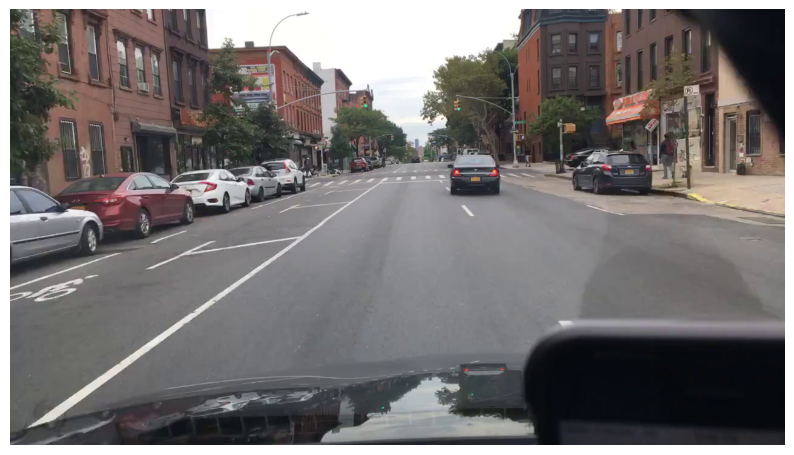

In [ ]:
display_cv2_img(img)

In [ ]:
cap.release()

Display Multiple Frames from the Video

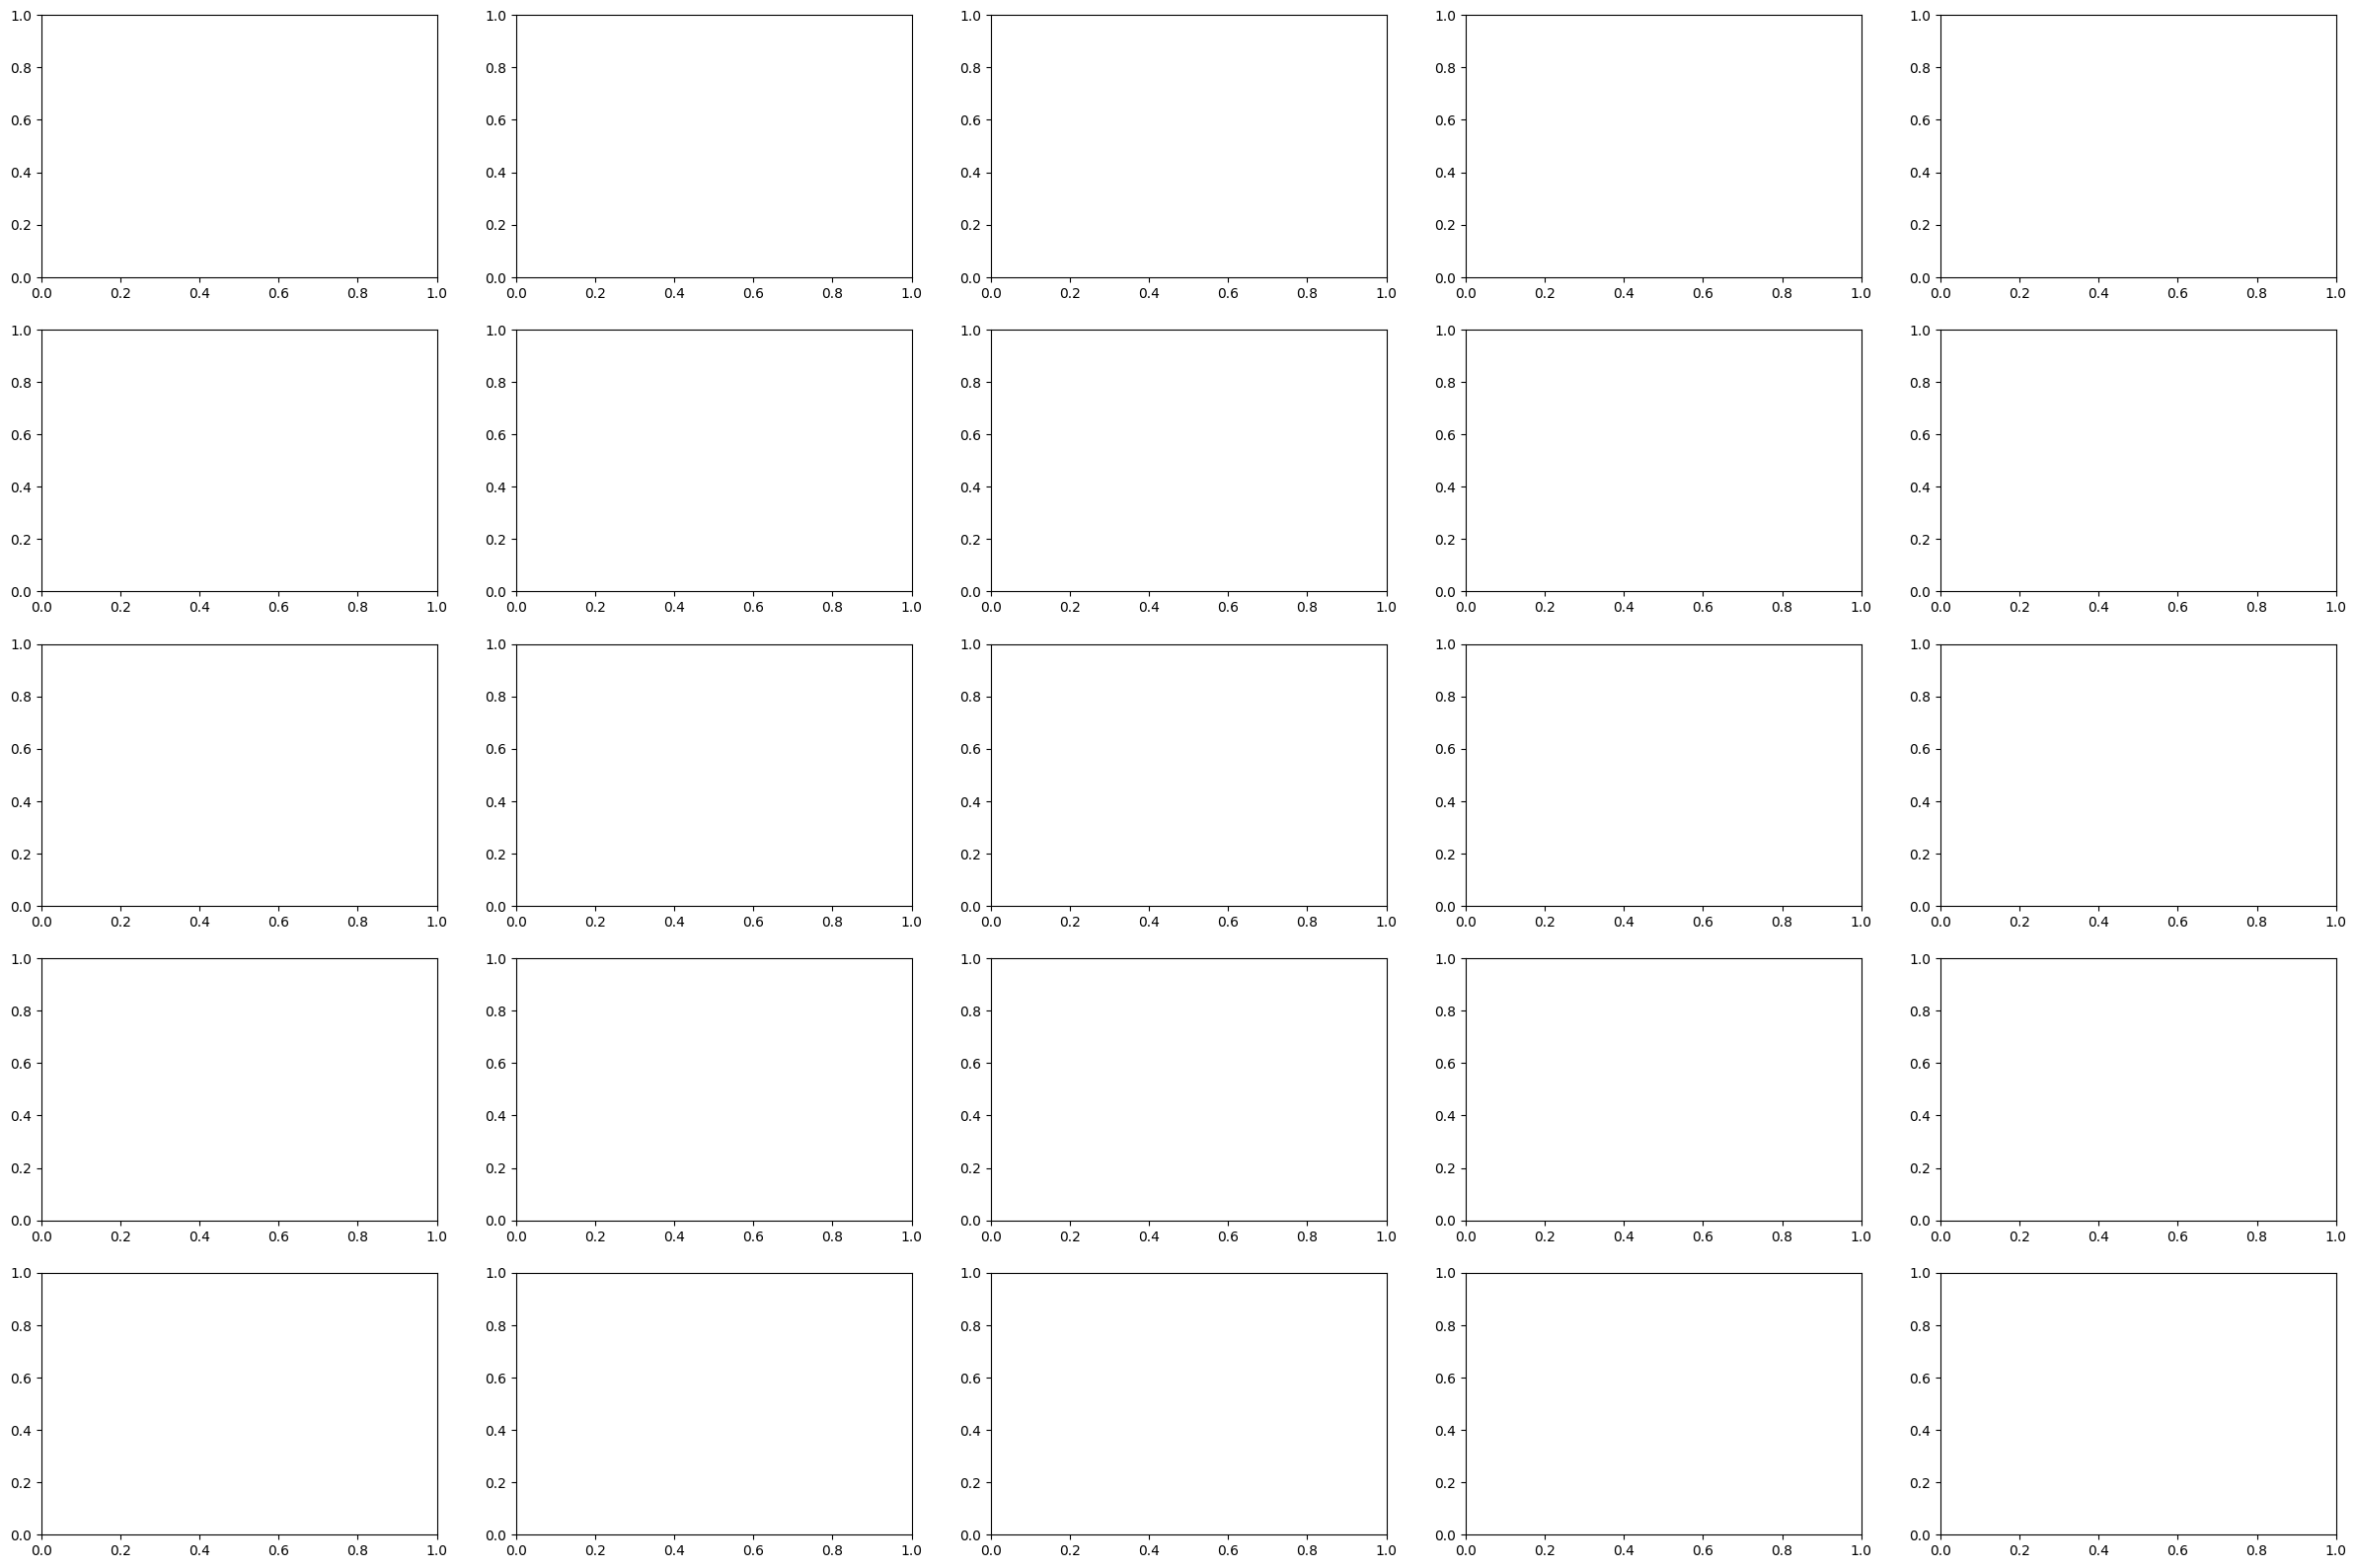

In [ ]:
fig, axs = plt.subplots(5, 5, figsize=(30, 20))
plt.show()

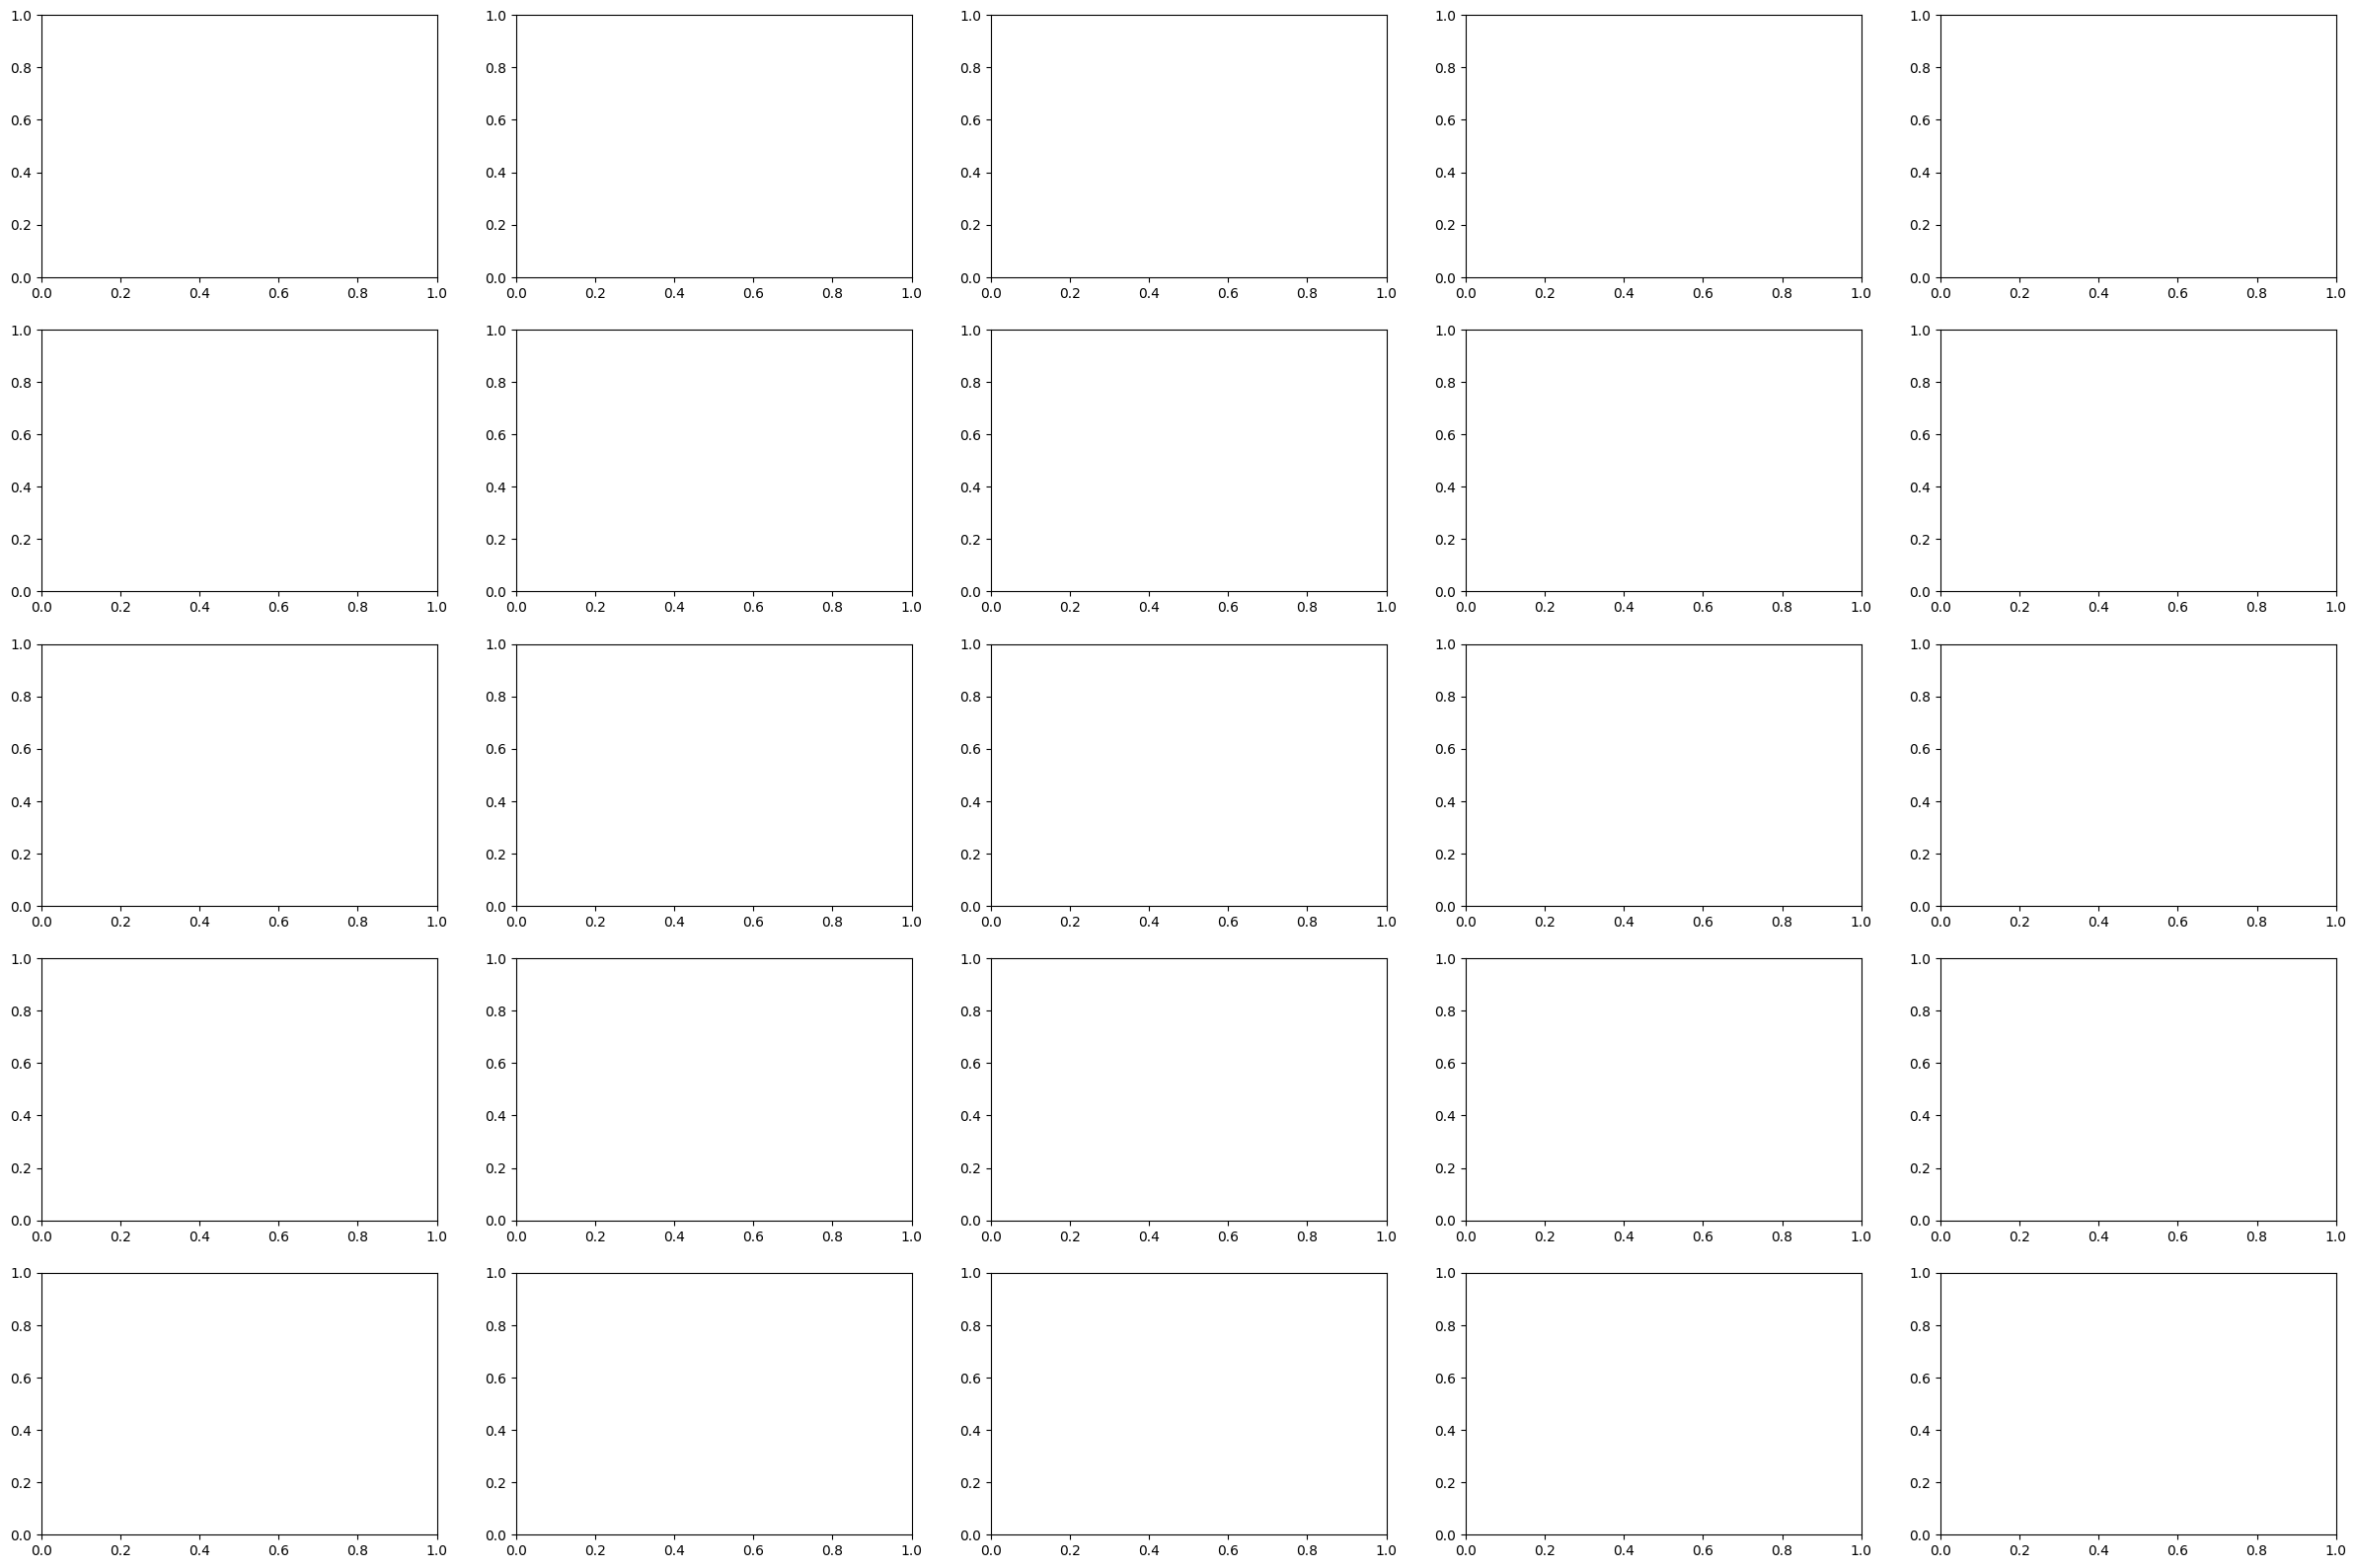

In [ ]:
fig, axs = plt.subplots(5, 5, figsize=(30, 20))
axs = axs.flatten()
plt.show()

# Without flatten → 2D grid (row, column)
# With flatten → 1D list (single index)

In [ ]:
import cv2
fig, axs = plt.subplots(5, 5, figsize=(30, 20))
axs = axs.flatten()

cap = cv2.VideoCapture("026c7465-309f6d33.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame % 100 == 0:                                          #frame is divisible by 100 - Note the modulo operator
        axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[img_idx].set_title(f'Frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1

plt.tight_layout()                                                #automatically adjusts the spacing between the plots
plt.show()
cap.release()


In [ ]:
labels = pd.read_csv('mot_labels.csv',low_memory=False)
##labels.head()
#video_labels = (labels.query('videoName == "026c7465-309f6d33"').reset_index(drop=True).copy())
#video_labels["video_frame"] = (video_labels["frameIndex"] * 11.9).round().astype("int") #Video is at 60Hz but the labellers did only 5 Hz

In [ ]:
#print(video_labels.shape)

(0, 14)


In [ ]:
print(labels["category"].value_counts())

category
car              394391
pedestrian        67862
truck             22812
bus               10694
bicycle            3823
other vehicle      3756
rider              3307
motorcycle         2277
other person        782
trailer             376
train               156
Name: count, dtype: int64


In [ ]:
cap = cv2.VideoCapture("026c7465-309f6d33.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame == 1035:
        break
cap.release()

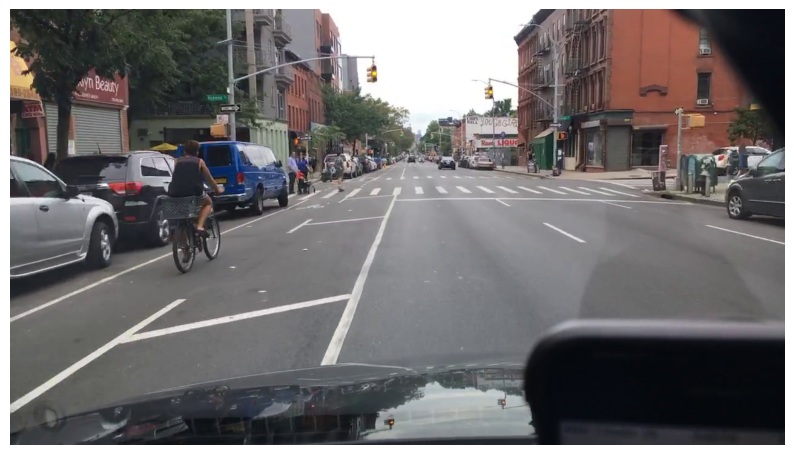

In [ ]:
display_cv2_img(img)